In [26]:
import pandas
save_flag =0
save_flag = input('Save outputs? Enter 1 for yes and 0 for no')

if save_flag == 1:
    global file
    file = input('Selet a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".
    raw_file = file

Note that this tool only has a few limitations:
- it looks at straight balance-driven schemes only. It can't process the structure of ranked choice voting, powered voting, or other schemes.
- To calculate costs, the token used by the DAO to vote must be included in its list of supported tokens. Otherwise the process will fail. In this case, I recommend you use the original version of Snapshotsurfer.

In [27]:
from datetime import datetime
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import math
import pandas as pd
import  os as os
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep as sleep
from pycoingecko import CoinGeckoAPI


In [28]:
sg = Subgrounds()
snapshot = sg.load_api('https://hub.snapshot.org/graphql')

cg = CoinGeckoAPI()

In [29]:
snapshot.Proposal.datetime = SyntheticField(
  lambda timestamp: str(datetime.fromtimestamp(timestamp)),
  SyntheticField.STRING,
  snapshot.Proposal.end,
)

In [30]:
spacename = input('spacename plz?')
# based on their url, for example "curve.eth" for  https://snapshot.org/#/curve.eth


In [31]:
#playground cell

props = snapshot.Query.proposals(
    first=5000,
    orderby = 'name',
    orderdirection = 'asc',
    where  =[snapshot.Proposal.space == spacename ] ##'fuse.eth',
)

props = sg.query_df([
    props.id,
    props.strategies.name
])

props = pd.DataFrame(props)

#spaces_list_clean = spaces_list.copy(deep=True)
props_clean = db.query("Select *  from props ").df()
props_clean.head(100)

,proposals_id,proposals_strategies_name
0,0x16d55ed730076b4f6ea09b9fcc62ea846b248a96f40f...,erc20-balance-of
1,0x16d55ed730076b4f6ea09b9fcc62ea846b248a96f40f...,aave-governance-power
2,0x16d55ed730076b4f6ea09b9fcc62ea846b248a96f40f...,multichain
3,0x16d55ed730076b4f6ea09b9fcc62ea846b248a96f40f...,contract-call
4,0x16d55ed730076b4f6ea09b9fcc62ea846b248a96f40f...,multichain
...,...,...
95,0x669d6c67dfc4ca944f74c3e311060f844fc069065ab7...,erc20-balance-of
96,0x669d6c67dfc4ca944f74c3e311060f844fc069065ab7...,aave-governance-power
97,0x669d6c67dfc4ca944f74c3e311060f844fc069065ab7...,multichain
98,0x669d6c67dfc4ca944f74c3e311060f844fc069065ab7...,contract-call


In [32]:
proposals = snapshot.Query.proposals(
  orderBy='created',
  orderDirection='desc',
  first=10000,
  where=[
    snapshot.Proposal.space == spacename, ##'fuse.eth',
    snapshot.Proposal.state == 'closed'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)


In [33]:
coinlist = pd.DataFrame(cg.get_coins_list())

coinlist.set_index('symbol', inplace=True)
coinlist.drop(['name'],axis = 1)
coinlist= coinlist.drop(columns=['name'])
#coinlist.head(10)


In [34]:
token_symbol_input = input('DAO token ticker plz? Go to https://docs.google.com/spreadsheets/d/1wTTuxXt8n9q7C4NDXqQpI3wpKu1_5bGVmP9Xz0XGSyU/edit#gid=0 for a reference sheet')
token_symbol_input = token_symbol_input.lower()
token_symbol_input

'aave'

tokens =  snapshot.Query.spaces(
  where=[
    snapshot.Query.space.id == spacename, ##'fuse.eth'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)
token_symbol = sg.query_df(tokens.symbol)
token_symbol.columns = ['symbol']
token_symbol.set_index('symbol', inplace=True)
##token_symbol = token_symbol.iat[0,0]
#token_symbol['symbol'].str.lower()
#token_symbol['symbol'] = token_symbol['symbol'].map(str.lower)
##token_symbol.loc['symbol']

token_symbol.head(10)

In [35]:
token_symbol = pd.DataFrame()
token_symbol["symbol"] = ""
token_symbol.at[0] = token_symbol_input
token_symbol

,symbol
0,aave


In [36]:
token_id = pd.merge(left=token_symbol, right=coinlist, on='symbol', how='left')
token_id = token_id.head(1)
token_id = token_id.iat[0,1]
#token_id = coinlist.loc[(coinlist.id == token_symbol)].reset_index(drop = True)
#coinlist[‘symbol’] = df[‘birthmonth’].map(birthmonth_map)
token_id

'aave'

In [37]:
cg.get_price(ids=token_id, vs_currencies='usd')

{'aave': {'usd': 107.51}}

In [38]:
proposals_snapshots = sg.query_df([
    proposals.title,
    proposals.id,
    proposals.body,
    proposals.scores_total,
    proposals.created
])

In [39]:
proposals_choices = sg.query(proposals.choices)

In [40]:
proposals_choices = pd.DataFrame(proposals_choices)

In [41]:
olympus_governance_view = pd.concat([proposals_snapshots,proposals_choices], axis=1)

In [42]:
##let's view the output just to make sure
olympus_governance_view.head(50)

,proposals_title,proposals_id,proposals_body,proposals_scores_total,proposals_created,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,21
0,[ARC] Aave V3 Fantom - Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,Simple Summary\nThis ARC proposes to freeze th...,274285.345496,1659857879,YAE,NAY,ABSTAIN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,### Simple Summary\n\nAdd a disclaimer to the ...,281852.705369,1659840546,YAE,NAY,ABSTAIN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[ARC] Increase Supply Cap of sUSD on v3 Optimi...,bafkreiasu3ha5kldlsqukqu7vq3ar7bujgd6qkvwxsx34...,Current parameters:\n\nSupply cap: 10M sUSD → ...,196079.823306,1659739339,Increase sUSD Supply Cap to 20m,Leave sUSD Supply Cap as is,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Risk Parameter Updates for Aave V2: 2022-08-04,bafkreiadrflzmxc5gipwlbyrvejvuiggsexcl7f2ha4pd...,\n## Simple Summary\n\nA proposal to adjust se...,144866.276242,1659655349,YAE,NAY,ABSTAIN,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Greenlight for GHO,0xb17b3294dcb08316cb623c717add7f82df54948d5589...,## Summary \n \n\nAave Companies is proposi...,500753.742356,1658924851,YAE,NAE,ABSTAIN,None,None,...,None,None,None,None,None,None,None,None,None,None
5,ARC: Extend the Safety Module Protection to Aa...,bafkreiba2pdfwoesezgpedf37bjfgadxmaigavoulek5w...,---\n\ntitle: ARC: Extend the Safety Module Pr...,260700.256482,1658866600,YAE - Do Extend SM Avalanche v2,NAE - Don't Extend SM Avalan..v2,Abstain,None,None,...,None,None,None,None,None,None,None,None,None,None
6,ARC: Extend the Safety Module Protection to Aa...,bafkreieeyh6pbqwhgryo6v67oxlmnfhaptrgkc3u7y6bv...,---\n\ntitle: ARC: Extend the Safety Module Pr...,443552.139433,1658866422,YAE - Do Extend SM to ARC market,NAE - Don't Extend SM ARC market,Abstain,None,None,...,None,None,None,None,None,None,None,None,None,None
7,ARC: Add support for BTC.b (Native Bitcoin bri...,0xa947772b3880e77a14ffc22cb30cde36332fd2f779b3...,Vote:\nYES = In-favour of listing BTC.b on the...,200706.037675,1658841305,Yes,No,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,ARC: Extend the Safety Module Protection to Aa...,0x7da4985b2d5b1cbe6bbc0992d5c86030cedef2013487...,---\n\ntitle: ARC: Extend the Safety Module Pr...,194045.791666,1658774645,YAE - Do Extend SM Polygon v2,NAE - Don't Extend SM Polygon v2,Abstain,None,None,...,None,None,None,None,None,None,None,None,None,None
9,[ARC] Increase Supply Cap of sAVAX on v3 Aval...,0x18e311f3d443e2d256e6e75f1aed7a568f7bc2d8c349...,Current parameters:\nSupply cap: `500k sAVAX` ...,207812.173102,1658735419,Yes,No,Abstain,None,None,...,None,None,None,None,None,None,None,None,None,None


In [43]:
#let's remove any proposal that's not a simple erc-balance-of

olympus_governance_view_filtered = db.query("Select distinct "
                                            "   A.proposals_title,A.proposals_id,A.proposals_scores_total,A.proposals_created "
                                            " , B.proposals_strategies_name "
                                            "From olympus_governance_view A "
                                            "   inner join  props_clean B on lower(A.proposals_id) = lower(B.proposals_id) "
                                            #"#where proposals_strategies_name =  ('erc20-balance-of') "
                                            " where proposals_strategies_name in  ('erc20-balance-of','delegation','erc20-votes','erc20-balance-of-delegation','multichain','uni','aave-governance-power', 'contract-call' ) ").df()  #in 'delegation','erc20-votes',").df()  #in 'delegation','erc20-votes','ens-reverse-record


olympus_governance_view_filtered.head(100)


,proposals_title,proposals_id,proposals_scores_total,proposals_created,proposals_strategies_name
0,[ARC] Aave V3 Fantom - Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20-balance-of
1,[ARC] Aave V3 Fantom - Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave-governance-power
2,[ARC] Aave V3 Fantom - Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,multichain
3,[ARC] Aave V3 Fantom - Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,contract-call
4,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,erc20-balance-of
...,...,...,...,...,...
95,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,aave-governance-power
96,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,multichain
97,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,contract-call
98,ARC: Risk Parameter Updates for Aave V2 and Aa...,QmZvNZLEvpEvrmaKkzKUxUvpadT9rZHN4uSkKxzEuUnFSb,101457.059707,1653601406,multichain


In [44]:
#let's remove duplicate rows the easy way, and add the name of the DAO to the table
olympus_governance_view_filtered = olympus_governance_view_filtered.copy(deep=True)
olympus_governance_view_clean = pd.DataFrame()
olympus_governance_view_clean = db.query("select "
                                 "  *"
                                 "  , (to_timestamp((proposals_created::bigint)))::date proposal_date  "
                                 ""
                                 "from olympus_governance_view_filtered ").df()
#make sure we know which DAO we are working with
olympus_governance_view_clean.insert(0, 'DAO', spacename)
#we are going to add the price data for each one of the dates involved using the coingecko API
olympus_governance_view_clean = olympus_governance_view_clean.replace('[^a-zA-Z0-9,.;,,]', ' ', regex = True)
#olympus_governance_view_clean = olympus_governance_view_filtered.replace('[^a-zA-Z0-9,.;,,]', ' ', regex = True)
#olympus_governance_view_clean.replace(r"[^a-zA-Z ]+", " ", " ", regex = True)
olympus_governance_view_clean['usd_price'] = ""

#olympus_governance_view_clean.dropna(subset=['usd_price'], inplace=True)
olympus_governance_view_clean.head(100)

,DAO,proposals_title,proposals_id,proposals_scores_total,proposals_created,proposals_strategies_name,proposal_date,usd_price
0,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20 balance of,2022-08-07,
1,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave governance power,2022-08-07,
2,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,multichain,2022-08-07,
3,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,contract call,2022-08-07,
4,aave.eth,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,erc20 balance of,2022-08-07,
...,...,...,...,...,...,...,...,...
95,aave.eth,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,aave governance power,2022-05-27,
96,aave.eth,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,multichain,2022-05-27,
97,aave.eth,Add Transak fiat on ramp service on Aave,0x011c725f11b8da5de80cef9b52a5deccb120fcd7f276...,43890.572003,1653654149,contract call,2022-05-27,
98,aave.eth,ARC Risk Parameter Updates for Aave V2 and Aa...,QmZvNZLEvpEvrmaKkzKUxUvpadT9rZHN4uSkKxzEuUnFSb,101457.059707,1653601406,multichain,2022-05-26,


In [45]:
total_proposals = len(olympus_governance_view_clean)
total_proposals

560

In [46]:
max_index = len(olympus_governance_view_clean.columns)
max_index

8

test = olympus_governance_view_clean.iloc[0,max_index-2]
test = test.strftime("%d-%m-%Y")
print(test)

You're about to pull data out of Coingecko's free API. This will be a slow process to stay within the limits.

In [47]:
#cg.get_coin_history_by_id(id=token_id, date = '04-06-2021')

In [48]:
#now we need to find the price on the date of each proposal
prop_counter = 0
while prop_counter < total_proposals:
    sleep(0.25)
    try:
        pricedate = olympus_governance_view_clean.iloc[prop_counter,(max_index-2)]
        #format price_date to dd-mm-yyyy
        pricedate =pricedate.strftime("%d-%m-%Y")
        pricehist = cg.get_coin_history_by_id(id=token_id, date = pricedate)
        pricehist = pd.DataFrame(pricehist)
        pricehist = pricehist.loc ['current_price','market_data']
        pricehist = pricehist['usd']
        olympus_governance_view_clean.at[prop_counter, 'usd_price'] = pricehist
        prop_counter+1
        crit = prop_counter%15
        crit2 = prop_counter%40
        if prop_counter>1:
            if crit==0: ##trying to avoid getting rate limited. Limit is 50 per minute
                print(crit, prop_counter, 'records pulled. Now resting')
                sleep(75)
            else:
                if crit2==0: ##trying to avoid getting rate limited. Limit is 50 per minute
                    print(crit, prop_counter, 'records pulled. Resting a bit more to be safu')
                    sleep(90)
        prop_counter = prop_counter+1
    except:
        prop_counter = prop_counter+1
        print('slipped on ', pricehist, 'at iteration', prop_counter)
        print('slipped. Getting up.')
    #print(prop_counter, pricedate)

olympus_governance_view_clean.head(10)

0 15 records pulled. Now resting
0 30 records pulled. Now resting
10 40 records pulled. Resting a bit more to be safu
0 45 records pulled. Now resting
0 60 records pulled. Now resting
0 75 records pulled. Now resting
5 80 records pulled. Resting a bit more to be safu
0 90 records pulled. Now resting
0 105 records pulled. Now resting
0 120 records pulled. Now resting
0 135 records pulled. Now resting
0 150 records pulled. Now resting
10 160 records pulled. Resting a bit more to be safu
0 165 records pulled. Now resting
0 180 records pulled. Now resting
0 195 records pulled. Now resting
5 200 records pulled. Resting a bit more to be safu
0 210 records pulled. Now resting
0 225 records pulled. Now resting
0 240 records pulled. Now resting
0 255 records pulled. Now resting
0 270 records pulled. Now resting
10 280 records pulled. Resting a bit more to be safu
0 285 records pulled. Now resting
0 300 records pulled. Now resting
0 315 records pulled. Now resting
5 320 records pulled. Resting a

,DAO,proposals_title,proposals_id,proposals_scores_total,proposals_created,proposals_strategies_name,proposal_date,usd_price
0,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20 balance of,2022-08-07,99.537014
1,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave governance power,2022-08-07,99.537014
2,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,multichain,2022-08-07,99.537014
3,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,contract call,2022-08-07,99.537014
4,aave.eth,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,erc20 balance of,2022-08-07,99.537014
5,aave.eth,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,aave governance power,2022-08-07,99.537014
6,aave.eth,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,multichain,2022-08-07,99.537014
7,aave.eth,Parameter Change Disclaimer in Borrow User Int...,bafkreiaiba6o7b3bsosligjrxnzlxgvkckgqriqlle6d4...,281852.705369,1659840546,contract call,2022-08-07,99.537014
8,aave.eth,ARC Increase Supply Cap of sUSD on v3 Optimi...,bafkreiasu3ha5kldlsqukqu7vq3ar7bujgd6qkvwxsx34...,196079.823306,1659739339,erc20 balance of,2022-08-05,96.923007
9,aave.eth,ARC Increase Supply Cap of sUSD on v3 Optimi...,bafkreiasu3ha5kldlsqukqu7vq3ar7bujgd6qkvwxsx34...,196079.823306,1659739339,aave governance power,2022-08-05,96.923007


In [49]:
if save_flag == 1:
    path =file+'/'+spacename+'_proposals_table_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view_clean))+'_proposals.csv'
    olympus_governance_view_clean.to_csv(path, index = False)

In [50]:
proposal_id = olympus_governance_view_clean.iloc[0,2]
proposal_id

'0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058e255fac13a2d224cc647'

In [51]:
vote_tracker = snapshot.Query.votes(
orderBy = 'created',
orderDirection='desc',
first=10000,
where=[
  snapshot.Vote.proposal == proposal_id
]
)

In [57]:
voting_snapshots_list_pre = pd.DataFrame()
voting_snapshots_list_pre = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    #vote_tracker.choice,
    vote_tracker.vp
])

In [58]:
voting_snapshots_list = db.query("select "
                                 "  *"
                                 "  , to_timestamp((votes_Created::bigint)) vote_timestamp  "
                                 ""
                                 "from voting_snapshots_list_pre").df()

In [59]:
voting_snapshots_list.head(10)

,votes_id,votes_voter,votes_created,votes_vp,vote_timestamp
0,QmaQgkmGp1Rdd1ePUzCjGj8azn1XzbyqpX93JETAGYgN4j,0x7606537AA57C29A0f54249Bd7f236F82D782ee0A,1634841648,0.002558,2021-10-21 18:40:48
1,QmWE8Rr5hygJSojRSUzBy76Dtx76SWQe7BG2q5vyfHW2VK,0x8354410A9cF0F77BF3eE77D1aA9C5BA79696B450,1634841039,18.275261,2021-10-21 18:30:39
2,QmeYpwNyaKRVaKx2V7Vox6FaJmJDH1L6XY7CqNuKoUnsvg,0xAD549C7fcF1bd3E57BCa464D9Dce0A0D561599D1,1634840998,42.578517,2021-10-21 18:29:58
3,QmUiLgTkYr1X9eEhHVXbryZKEVMZ2Q3TWSpXrpDnhjkUoh,0xd6649265Cd93342Cd0912D3Cb717Ea44073c64Ac,1634836404,0.011864,2021-10-21 17:13:24
4,QmZ83kYBh1TqAfwoqRxfpDHn4QbdrNRtHFgNay1giyJNUR,0xcd66a0Ae53cC1F58B2E709E5DeF44d06a19C71Ce,1634834111,0.050000,2021-10-21 16:35:11
5,QmRsqwCbhoQxPD5two32tuT3zskdwn7vjAmTdbRQt4j5pn,0x8d07D225a769b7Af3A923481E1FdF49180e6A265,1634833733,92.591917,2021-10-21 16:28:53
6,QmWt9GFggzkp2RPLpZsHgrPycKKvL5YQ8CH7ajhwtykmF3,0xf9fed4b7a8A6B410fB6B1d76459b66D05c613E49,1634825007,0.050000,2021-10-21 14:03:27
7,QmSA3fSoCK8j4i1UbyXvfZp1zR6CzVcKxYDSHYnY3gLMbJ,0xB1E6Cf9f87a0CDc408E83d81602da27F0DCB6636,1634824642,0.050274,2021-10-21 13:57:22
8,QmVs5SB2DMUkPkKcxmXGENGAXxYXSw2JNpgvAMjYdGd81U,0x49084125E425eD84a81e97F866043Ba413E959b9,1634823330,2.005028,2021-10-21 13:35:30
9,QmeFEfXVifwH8suGoBSgmKxVNywPuJCYTkQ5rpi4QQrRFj,0x06c4865ab16c9C760622f19a313a2E637E2e66a2,1634821188,0.100000,2021-10-21 12:59:48


In [60]:
x=0
while x <total_proposals:
    proposal_id = olympus_governance_view_clean.iloc[x,2]

    vote_tracker = snapshot.Query.votes(
    orderBy = 'created',
    orderDirection='desc',
    first=10000,
    where=[
      snapshot.Vote.proposal == proposal_id
    ]
    )
    voting_snapshots = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    #vote_tracker.choice,
    vote_tracker.vp
    ])

    voting_snapshots['Proposal'] = proposal_id
    voting_snapshots_list=pd.concat([voting_snapshots_list, voting_snapshots])

    x=x+1
    progress = 100*(round(x/total_proposals,0))
    ##clear_output(wait=True)

print(len(voting_snapshots_list),' records')

774559  records


In [64]:
#spit out the file
if save_flag == 1:
    path =file+'/'+spacename+'_voting_snapshots_list_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view_clean))+'.csv'
    voting_snapshots_list.to_csv(path, index = False)

In [65]:
#I join these two tables to create my charts as it makes life easier. We are going to build the charts here now, so here we go
governance_data = pd.merge(voting_snapshots_list, olympus_governance_view_clean, how='inner', left_on='Proposal', right_on='proposals_id')
#del governance_data["proposals_body"] #breaks the table with weird characters
governance_data["vote_value"] = governance_data["votes_vp"]*governance_data["usd_price"]
governance_data.head(10)

,votes_id,votes_voter,votes_created,votes_vp,vote_timestamp,Proposal,DAO,proposals_title,proposals_id,proposals_scores_total,proposals_created,proposals_strategies_name,proposal_date,usd_price,vote_value
0,0x9c337563c6f41b5c9da721e133d0c4cb2f86407e42eb...,0xeb68C1E2fb5A5E05D0518A9A47AfE605fB4fb2D3,1660211974,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20 balance of,2022-08-07,99.537014,1.065046
1,0x9c337563c6f41b5c9da721e133d0c4cb2f86407e42eb...,0xeb68C1E2fb5A5E05D0518A9A47AfE605fB4fb2D3,1660211974,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave governance power,2022-08-07,99.537014,1.065046
2,0x9c337563c6f41b5c9da721e133d0c4cb2f86407e42eb...,0xeb68C1E2fb5A5E05D0518A9A47AfE605fB4fb2D3,1660211974,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,multichain,2022-08-07,99.537014,1.065046
3,0x9c337563c6f41b5c9da721e133d0c4cb2f86407e42eb...,0xeb68C1E2fb5A5E05D0518A9A47AfE605fB4fb2D3,1660211974,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,contract call,2022-08-07,99.537014,1.065046
4,0x4d46a7eb26a1f23f24b4eaf01fa37a8d20e5575f29a9...,0xC054896aA6eAE1c4A85bf4eA1CF23a80Fe129f6e,1660211917,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20 balance of,2022-08-07,99.537014,1.065046
5,0x4d46a7eb26a1f23f24b4eaf01fa37a8d20e5575f29a9...,0xC054896aA6eAE1c4A85bf4eA1CF23a80Fe129f6e,1660211917,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave governance power,2022-08-07,99.537014,1.065046
6,0x4d46a7eb26a1f23f24b4eaf01fa37a8d20e5575f29a9...,0xC054896aA6eAE1c4A85bf4eA1CF23a80Fe129f6e,1660211917,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,multichain,2022-08-07,99.537014,1.065046
7,0x4d46a7eb26a1f23f24b4eaf01fa37a8d20e5575f29a9...,0xC054896aA6eAE1c4A85bf4eA1CF23a80Fe129f6e,1660211917,0.010700,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,contract call,2022-08-07,99.537014,1.065046
8,0x25405fcc30cd6df0ab1dce5c346f27ada99ce829c331...,0xf9B9ceB7680d269818D3BC5fA5CAe9a14981E008,1660211855,0.112548,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,erc20 balance of,2022-08-07,99.537014,11.202661
9,0x25405fcc30cd6df0ab1dce5c346f27ada99ce829c331...,0xf9B9ceB7680d269818D3BC5fA5CAe9a14981E008,1660211855,0.112548,NaT,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,aave.eth,ARC Aave V3 Fantom Freeze reserves,0xeefcd76e523391a14cfd0a79b531ea0a3faf0eb4a058...,274285.345496,1659857879,aave governance power,2022-08-07,99.537014,11.202661


In [66]:
#governance_data.to_csv('governance_data.csv', index = False)

In [ ]:
#Spit out the file, but save it in its own folder for easy access
if save_flag == 1:
    final_file = file+'\\'+'final'
    final_raw_file = final_file
    os.makedirs(final_raw_file, exist_ok=True)
    final_path =file+'\\'+spacename+'governance_data_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(governance_data))+'.csv'
    governance_data.to_csv(final_path, index = False)

In [69]:
crunch_data = db.query("select "
                           "Proposal"
                           ",votes_voter "
                           #",votes_choice"
                           ",votes_vp"
                           ",votes_created "
                       "    ,proposals_title "
                       "    ,proposal_date"
                       "    ,vote_value::double as usd_value"
                    "       , to_timestamp(min(votes_Created::bigint)) proposal_date "
                           ",sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_vp "
                       "    ,sum(vote_value::double) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_usd_value "
                           ",sum(votes_vp) over (Partition by Proposal) as total_vp "
                       "    ,sum(vote_value::double) over (Partition by Proposal) as total_usd_value "
                           ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as percentage_of_total_vp "
                           ",((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp "
                       ",round((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp_stepped "
                           ",row_number() over (Partition by Proposal order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                           ",count(votes_voter) over (Partition by Proposal  order by votes_vp desc, votes_created asc) total_voters "
                           ",(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal))::decimal percentage_voters_counted "
                           ",round(100*(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal)))::decimal percentage_voters_counted_stepped "
                       "from "
                       "    governance_data  "
                       ""
                       "Group by "
                       "    Proposal"
                       "    ,votes_voter"
                    #   "    ,votes_choice"
                       "    , votes_vp "
                       "    , votes_created "
                       "    , proposals_title "
                       "    ,proposal_date"
                       "    ,vote_value "
                       ""
                       "Order by "
                       "    7 asc, "
                       "    votes_vp desc "
                       "    , votes_created asc"
                       "").df()


crunch_data.insert(0, 'DAO', spacename)
crunch_data.head(n=10)


,DAO,Proposal,votes_voter,votes_vp,votes_created,proposals_title,proposal_date,usd_value,proposal_date_2,cumulative_vp,cumulative_usd_value,total_vp,total_usd_value,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
0,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xE2C6a4a3A83399775BA104f16F94D2eAe905d409,0.0,1629120310,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 13:25:10,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1027,1027,0.946544,95.0
1,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xaCd8C60B697e75323e84EE50193138f17Ab53c88,0.0,1629122751,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 14:05:51,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1028,1028,0.947465,95.0
2,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xaBa3Abe71987030782b3312F23CA0f199791A748,0.0,1629130061,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 16:07:41,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1029,1029,0.948387,95.0
3,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x29F4BC513421e123fd9A8cd4C159E40405eA02FE,0.0,1629133374,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 17:02:54,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1030,1030,0.949309,95.0
4,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x727dF4ab614E0025637C4d23b48171054E0F6DDe,0.0,1629150569,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 21:49:29,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1031,1031,0.950230,95.0
5,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xDb965BBAD97d0784Afc22A5D82a24c5478fAf7F4,0.0,1629153795,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 22:43:15,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1032,1032,0.951152,95.0
6,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xEae9C2A2C803BEcbC81F3A485a7cdA9D03E33165,0.0,1629169028,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 02:57:08,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1033,1033,0.952074,95.0
7,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xDb5D099a6d2f2BC090Fcd258CC564861d552C387,0.0,1629174618,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:30:18,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1034,1034,0.952995,95.0
8,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x2E3179c194EF3aBFaee73C38B45ef8c65b2137b1,0.0,1629175182,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:39:42,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1035,1035,0.953917,95.0
9,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x050CEC6a33D5ee57EaAA8124bdb9BCB7E0D817DB,0.0,1629175235,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:40:35,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1036,1036,0.954839,95.0


In [72]:
#leaders = crunch_data.loc[crunch_data['proposal_voter_rank'] <=3]
#leader_count = leaders.votes_voter.nunique()
#leader_count
#DONT ASK ME WHY THIS DIDNT WORK. HAVE TO DO IT THE UGLY WAY

leader_ranks = db.query("with leader_ranks as "
                        "(Select distinct "
                        "   B.Proposal"
                        "   ,B.votes_voter"
                        "   ,B.proposal_voter_rank "
                        "   ,B.cumulative_usd_value"
                        "   ,(B.proposal_voter_rank +1) as leader_rank "
                        "From "
                        "   (select "
                               "Proposal"
                               ",votes_voter "
                               #",votes_choice"
                               ",votes_vp"
                               ",votes_created  "
                       "        ,vote_value::double as usd_value"
                               ",sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_vp"
                       "    ,sum(vote_value::double) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_usd_value "
                               ",sum(votes_vp) over (Partition by Proposal) as total_vp"
                       "    ,sum(vote_value::double) over (Partition by Proposal) as total_usd_value "
                               ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as percentage_of_total_vp "
                               ",((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp "
                           "    ,round((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp_stepped "
                               ",row_number() over (Partition by Proposal order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                               ",count(votes_voter) over (Partition by Proposal  order by votes_vp desc, votes_created asc) total_voters "
                               ",(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal))::decimal percentage_voters_counted "
                               ",round(100*(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal)))::decimal percentage_voters_counted_stepped "
                           "from "
                           "    governance_data  "
                               ""
                           "Group by "
                           "    Proposal"
                           "    ,votes_voter"
                          # "    ,votes_choice"
                           "    , votes_vp "
                           "    , votes_created "
                        "       , vote_value "
                           ""
                           "Order by "
                           "    Proposal "
                           "    ,votes_vp desc "
                           "    , votes_created asc) B "
                        "where "
                        "   B.cum_percentage_of_total_vp<=0.5) "
                        ""
                        "Select "
                        "   *"
                        "From crunch_data A"
                        "   Join leader_ranks B on A.proposal_voter_rank = B.leader_rank and A.Proposal = B.Proposal"
                        ""
                    ).df()
leader_ranks




,DAO,Proposal,votes_voter,votes_vp,votes_created,proposals_title,proposal_date,usd_value,proposal_date_2,cumulative_vp,...,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped,Proposal_2,votes_voter_2,proposal_voter_rank_2,cumulative_usd_value_2,leader_rank
0,aave.eth,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,0x12EF2cD4231D5CF655a6CDD4Ac1524FFaa439c17,5.343445,1635627528,,2021-10-29,1.812477e+03,2021-10-30 20:58:48,15.343472,...,1.0,2,2,0.000280,0.0,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,0x9633d229b711dCbf06cDd8739238765e0F3135B0,1,3.391972e+03,2
1,aave.eth,0x05daecac1987857dc7469c648b8e56939bed5a652fda...,0xb4F70F2F0f1A27276571a12e60c64E321f40d47C,60411.926151,1652354799,ARC Whitelist Connext for V3 Portals,2022-05-09,7.599053e+06,2022-05-12 11:26:39,153853.926151,...,1.0,2,2,0.001533,0.0,0x05daecac1987857dc7469c648b8e56939bed5a652fda...,0xaFDAbFb6227507fF6522b8a242168F6b5F353a6E,1,1.175382e+07,2
2,aave.eth,0x0e564f5351b582f48a45bce5684389061fd770bc830c...,0xF670fD01a42a80C5098d4785638F7B0a8Ac69010,201.852928,1637415181,Do you want the AAVE network to launch a two t...,2021-11-20,5.662531e+04,2021-11-20 13:33:01,801.358805,...,1.0,2,2,0.000312,0.0,0x0e564f5351b582f48a45bce5684389061fd770bc830c...,0x6cfAc3Cf77A359D7ce28C14F2D53de48981e0F04,1,1.681779e+05,2
3,aave.eth,0x10e6378f193ec4a2953b3ca73b869475866762501913...,0xb4F70F2F0f1A27276571a12e60c64E321f40d47C,60000.000000,1649317482,Aave BGD Labs. Request for Approval,2022-04-04,1.456761e+07,2022-04-07 07:44:42,141858.283724,...,1.0,2,2,0.000258,0.0,0x10e6378f193ec4a2953b3ca73b869475866762501913...,0xF5Fb27b912D987B5b6e02A1B1BE0C1F0740E2c6f,1,1.987465e+07,2
4,aave.eth,0x18e311f3d443e2d256e6e75f1aed7a568f7bc2d8c349...,0x55B16934C3661E1990939bC57322554d9B09f262,73772.771101,1658776564,ARC Increase Supply Cap of sAVAX on v3 Aval...,2022-07-25,6.705755e+06,2022-07-25 19:16:04,167233.161025,...,1.0,2,2,0.001276,0.0,0x18e311f3d443e2d256e6e75f1aed7a568f7bc2d8c349...,0xaFDAbFb6227507fF6522b8a242168F6b5F353a6E,1,8.495308e+06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,aave.eth,bafkreiasu3ha5kldlsqukqu7vq3ar7bujgd6qkvwxsx34...,0xdd45542cCf17A16F5c515c20db7F7C7D8bB74Cc5,55500.000000,1659891152,ARC Increase Supply Cap of sUSD on v3 Optimi...,2022-08-05,5.379227e+06,2022-08-07 16:52:32,122654.121629,...,1.0,2,2,0.001537,0.0,bafkreiasu3ha5kldlsqukqu7vq3ar7bujgd6qkvwxsx34...,0x55B16934C3661E1990939bC57322554d9B09f262,1,6.508779e+06,2
69,aave.eth,bafkreiba2pdfwoesezgpedf37bjfgadxmaigavoulek5w...,0x732a4B05C31da514e30411d79E3E17624579B848,66172.462070,1659195943,ARC Extend the Safety Module Protection to Aa...,2022-07-26,5.415611e+06,2022-07-30 15:45:43,139945.233171,...,1.0,2,2,0.000931,0.0,bafkreiba2pdfwoesezgpedf37bjfgadxmaigavoulek5w...,0x55B16934C3661E1990939bC57322554d9B09f262,1,6.037626e+06,2
70,aave.eth,bafkreieeyh6pbqwhgryo6v67oxlmnfhaptrgkc3u7y6bv...,0x55B16934C3661E1990939bC57322554d9B09f262,73772.771101,1658866662,ARC Extend the Safety Module Protection to Aa...,2022-07-26,6.037626e+06,2022-07-26 20:17:42,257148.477420,...,1.0,2,2,0.001007,0.0,bafkreieeyh6pbqwhgryo6v67oxlmnfhaptrgkc3u7y6bv...,0x5B3bFfC0bcF8D4cAEC873fDcF719F60725767c98,1,1.500762e+07,2
71,aave.eth,bafkreigdmcfmwvnxfolpds4xkdicgrszgmknig7pz2r2t...,0xc17cB209D5aBdb2d00f566a1E48F558DEBC264E1,103333.847730,1658795095,Risk Off Framework for the Aave Protocol,2022-07-21,9.397305e+06,2022-07-26 00:24:55,286709.554049,...,1.0,2,2,0.000777,0.0,bafkreigdmcfmwvnxfolpds4xkdicgrszgmknig7pz2r2t...,0x5B3bFfC0bcF8D4cAEC873fDcF719F60725767c98,1,1.667641e+07,2


In [73]:
dao_members = crunch_data.groupby('DAO').votes_voter.nunique()
dao_members = dao_members.iloc[0]
leader_count =leader_ranks.votes_voter.nunique()
elite = round((leader_count)/(dao_members),4)

print(dao_members, "{0:.2%}".format(elite))


23942 0.18%


In [74]:
crunch_data.head(10)

,DAO,Proposal,votes_voter,votes_vp,votes_created,proposals_title,proposal_date,usd_value,proposal_date_2,cumulative_vp,cumulative_usd_value,total_vp,total_usd_value,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
0,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xE2C6a4a3A83399775BA104f16F94D2eAe905d409,0.0,1629120310,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 13:25:10,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1027,1027,0.946544,95.0
1,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xaCd8C60B697e75323e84EE50193138f17Ab53c88,0.0,1629122751,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 14:05:51,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1028,1028,0.947465,95.0
2,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xaBa3Abe71987030782b3312F23CA0f199791A748,0.0,1629130061,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 16:07:41,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1029,1029,0.948387,95.0
3,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x29F4BC513421e123fd9A8cd4C159E40405eA02FE,0.0,1629133374,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 17:02:54,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1030,1030,0.949309,95.0
4,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x727dF4ab614E0025637C4d23b48171054E0F6DDe,0.0,1629150569,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 21:49:29,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1031,1031,0.950230,95.0
5,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xDb965BBAD97d0784Afc22A5D82a24c5478fAf7F4,0.0,1629153795,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-16 22:43:15,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1032,1032,0.951152,95.0
6,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xEae9C2A2C803BEcbC81F3A485a7cdA9D03E33165,0.0,1629169028,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 02:57:08,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1033,1033,0.952074,95.0
7,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0xDb5D099a6d2f2BC090Fcd258CC564861d552C387,0.0,1629174618,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:30:18,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1034,1034,0.952995,95.0
8,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x2E3179c194EF3aBFaee73C38B45ef8c65b2137b1,0.0,1629175182,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:39:42,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1035,1035,0.953917,95.0
9,aave.eth,QmXtz8SHLFD2gFrHBb9QNjkVfKKtYWBkB6g2rk1BhVjzfY,0x050CEC6a33D5ee57EaAA8124bdb9BCB7E0D817DB,0.0,1629175235,List GHST on Aave Polygon Market,2021-08-16,0.0,2021-08-17 04:40:35,194270.982103,7.971327e+07,194270.982103,7.971327e+07,0.0,1.0,1.0,1036,1036,0.954839,95.0


In [75]:
crunch_data.describe()

,votes_vp,votes_created,usd_value,cumulative_vp,cumulative_usd_value,total_vp,total_usd_value,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
count,1.935110e+05,1.935110e+05,1.935110e+05,193511.000000,1.935110e+05,193511.000000,1.935110e+05,1.935110e+05,193511.000000,193511.000000,193511.000000,193511.000000,193511.000000,193511.000000
mean,9.329109e+01,1.647756e+09,1.858649e+04,133360.237042,2.272333e+07,133495.390222,2.274854e+07,7.234731e-04,0.999044,0.999649,2003.739141,2003.777175,0.500374,50.038117
std,2.991967e+03,8.395691e+06,7.349515e+05,138217.322293,2.909023e+07,138378.937365,2.913057e+07,1.816137e-02,0.018181,0.019815,2063.800801,2063.829638,0.288682,28.870815
min,0.000000e+00,1.624314e+09,0.000000e+00,0.008034,2.546016e+00,0.029858,9.461760e+00,0.000000e+00,0.182526,0.000000,1.000000,1.000000,0.000110,0.000000
25%,1.000000e-08,1.639836e+09,2.458752e-06,21097.226948,4.124437e+06,21097.226991,4.124438e+06,0.000000e+00,0.999973,1.000000,404.000000,404.000000,0.250371,25.000000
50%,1.939901e-04,1.649206e+09,3.486372e-02,111672.011448,1.215687e+07,111672.139471,1.215832e+07,0.000000e+00,1.000000,1.000000,1166.000000,1166.000000,0.500331,50.000000
75%,1.500000e-02,1.654051e+09,1.893520e+00,206592.381142,3.125934e+07,206622.244782,3.125934e+07,1.587822e-07,1.000000,1.000000,3113.000000,3113.000000,0.750348,75.000000
max,2.457698e+05,1.660242e+09,9.443372e+07,699456.790235,1.729015e+08,699456.790235,1.729015e+08,9.985457e-01,1.500000,2.000000,9056.000000,9056.000000,1.000000,100.000000


In [76]:
crunch_data.to_csv('crunch_data.csv', index = False)

In [77]:
##spit out the file!
if save_flag == 1:
    crunch_data_path=final_file+'\\'+spacename+'_crunch_data_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(governance_data))+'.csv'
    crunch_data.to_csv(crunch_data_path, index = False)

In [78]:
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp", "percentage_voters_counted", "cumulative_usd_value"].agg("mean").reset_index()
data_means.insert(0, 'DAO', spacename)
data_means.head(51)

C:\Users\ianfe\AppData\Local\Temp\ipykernel_12648\1097601994.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp", "percentage_voters_counted", "cumulative_usd_value"].agg("mean").reset_index()


,DAO,percentage_voters_counted_stepped,cum_percentage_of_total_vp,percentage_voters_counted,cumulative_usd_value
0,aave.eth,0.0,0.881792,0.002655,1.887785e+07
1,aave.eth,1.0,0.972907,0.010000,2.218698e+07
2,aave.eth,2.0,0.989815,0.019994,2.270937e+07
3,aave.eth,3.0,0.994528,0.029985,2.266075e+07
4,aave.eth,4.0,0.996542,0.039998,2.274020e+07
5,aave.eth,5.0,0.997276,0.049994,2.263543e+07
6,aave.eth,6.0,0.998321,0.059995,2.279904e+07
7,aave.eth,7.0,0.998726,0.069970,2.288915e+07
8,aave.eth,8.0,0.998974,0.079971,2.256672e+07
9,aave.eth,9.0,0.999197,0.089993,2.279381e+07


In [79]:
if save_flag == 1:
    data_means_file =final_file+'\\'+spacename+'data_means_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(governance_data))+'.csv'
    crunch_data.to_csv(data_means_file, index = False)

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\ianfe\AppData\Local\Temp\ipykernel_12648\1010475103.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()


,percentage_voters_counted_stepped,cum_percentage_of_total_vp,percentage_voters_counted
0,0.0,0.881792,0.002655
1,1.0,0.972907,0.010000
2,2.0,0.989815,0.019994
3,3.0,0.994528,0.029985
4,4.0,0.996542,0.039998
...,...,...,...
96,96.0,1.000312,0.959996
97,97.0,1.000340,0.970000
98,98.0,1.000339,0.979990
99,99.0,1.000339,0.990001


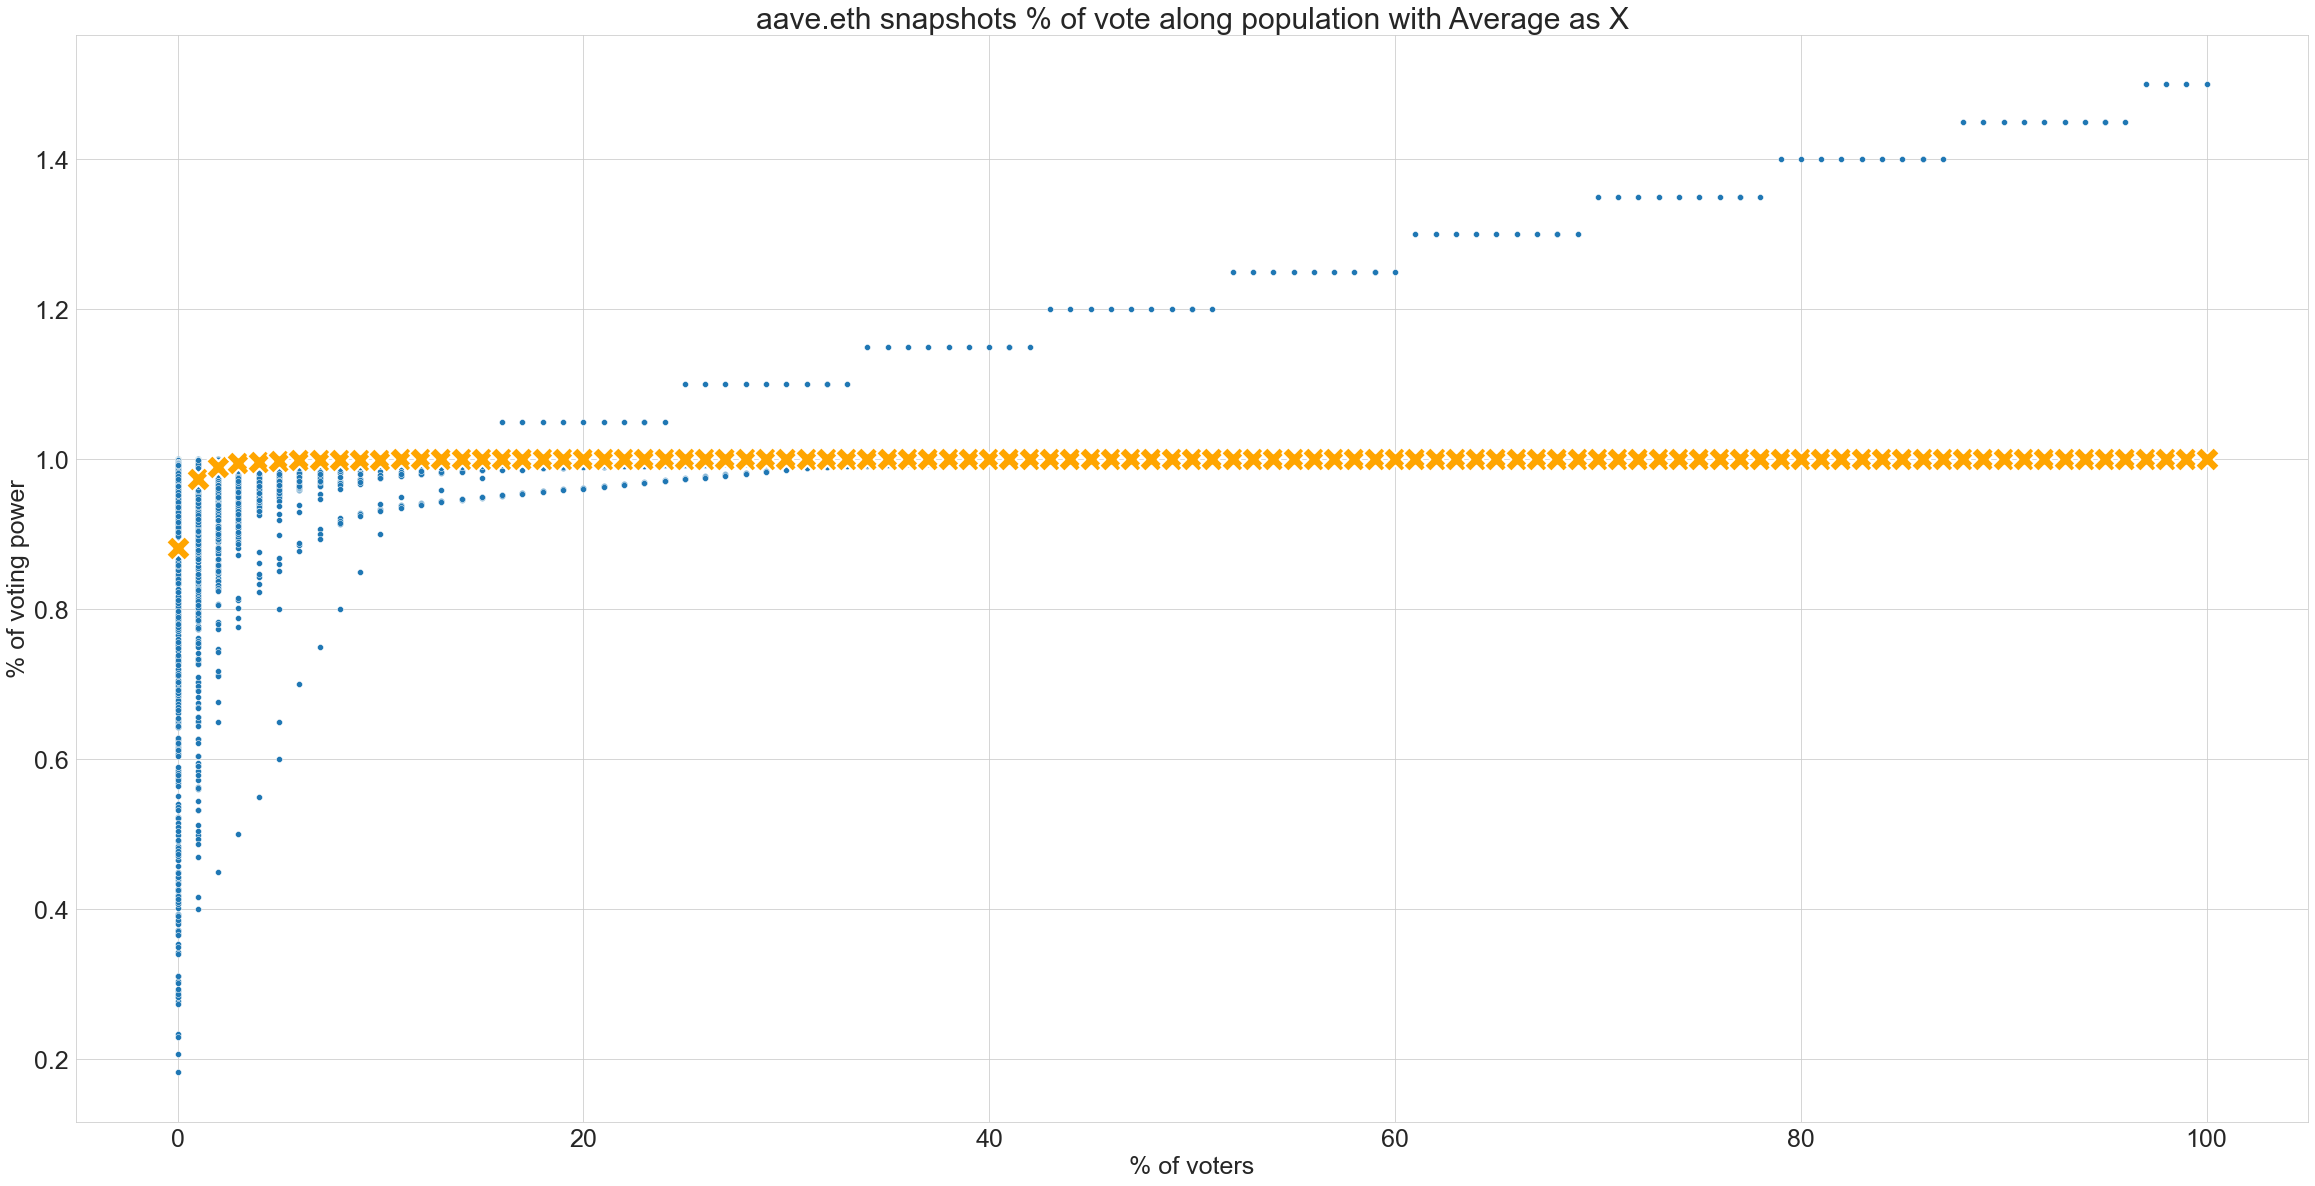

In [94]:
#plt.rc("figure", figsize=(40, 20))
sns.set_style("whitegrid")
plt.rc("font", size=25)
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()
##print(data_means)
plot_title = spacename + ' snapshots % of vote along population with Average as X'

ax=sns.scatterplot(data=crunch_data, y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped").set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')
chart = sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp",zorder=3, s=600,marker='X',color = 'orange')
#and save the chart file, too
#plt.savefig(final_file+'\\'+spacename+' vote power distribution.png', dpi=100)

#means_data_path =final_file+'\\'+spacename+'_means_'+'.csv'
#data_means.to_csv(means_data_path, index = False)

print(chart)
data_means

The chart above shows what % of all possible votes has been cast (Y axis) as each incremental percent of the voting population casts their vote (X axis). Each line is a Proposal and has a unique color, so that a dot on each percent point represents what % of total voting power was accumulated by that group. The color represents which vote was cast.
The Orange X shows the average % of power accumulated across all elections.

In [81]:
proposal_prices = db.query("Select distinct "
                           "proposal_date::date proposal_date "
                           " ,count(distinct votes_voter) unique_voters"
                           ",(max(cumulative_usd_value))::decimal proposal_usd_value "
                           "From crunch_data "
                           "where percentage_voters_counted_stepped=50 "
                           "Group by proposal_date"
                           "").df()

proposal_prices.head(50)

,proposal_date,unique_voters,proposal_usd_value
0,2022-03-18,91,3.711694e+05
1,2021-11-20,103,6.904338e+06
2,2022-05-05,71,1.917641e+07
3,2021-11-09,64,7.022260e+06
4,2022-03-28,70,4.382284e+07
5,2021-10-29,72,8.103435e+03
6,2022-04-22,72,4.156101e+05
7,2022-04-10,128,5.311430e+06
8,2022-07-26,56,3.630007e+07
9,2022-06-24,21,1.414494e+07


In [82]:
avg_price = db.query("Select distinct "
                           "proposal_date::date proposal_date"
                     "      , proposal_usd_value "
                           ",avg(proposal_usd_value) over (order by proposal_date rows between unbounded preceding and unbounded following) avg_proposal_price "
                           "From proposal_prices "
                           "Group by proposal_date,proposal_usd_value"
                           "").df()

avg_price_display = avg_price.iloc[0,2]

avg_price.head(10)
'${:,.2f}'.format(avg_price_display)
print('It costs an average of', '${:,.2f}'.format(avg_price_display), 'to control an election at ', spacename)

It costs an average of $28,657,411.57 to control an election at  aave.eth


AxesSubplot(0.125,0.125;0.775x0.755)


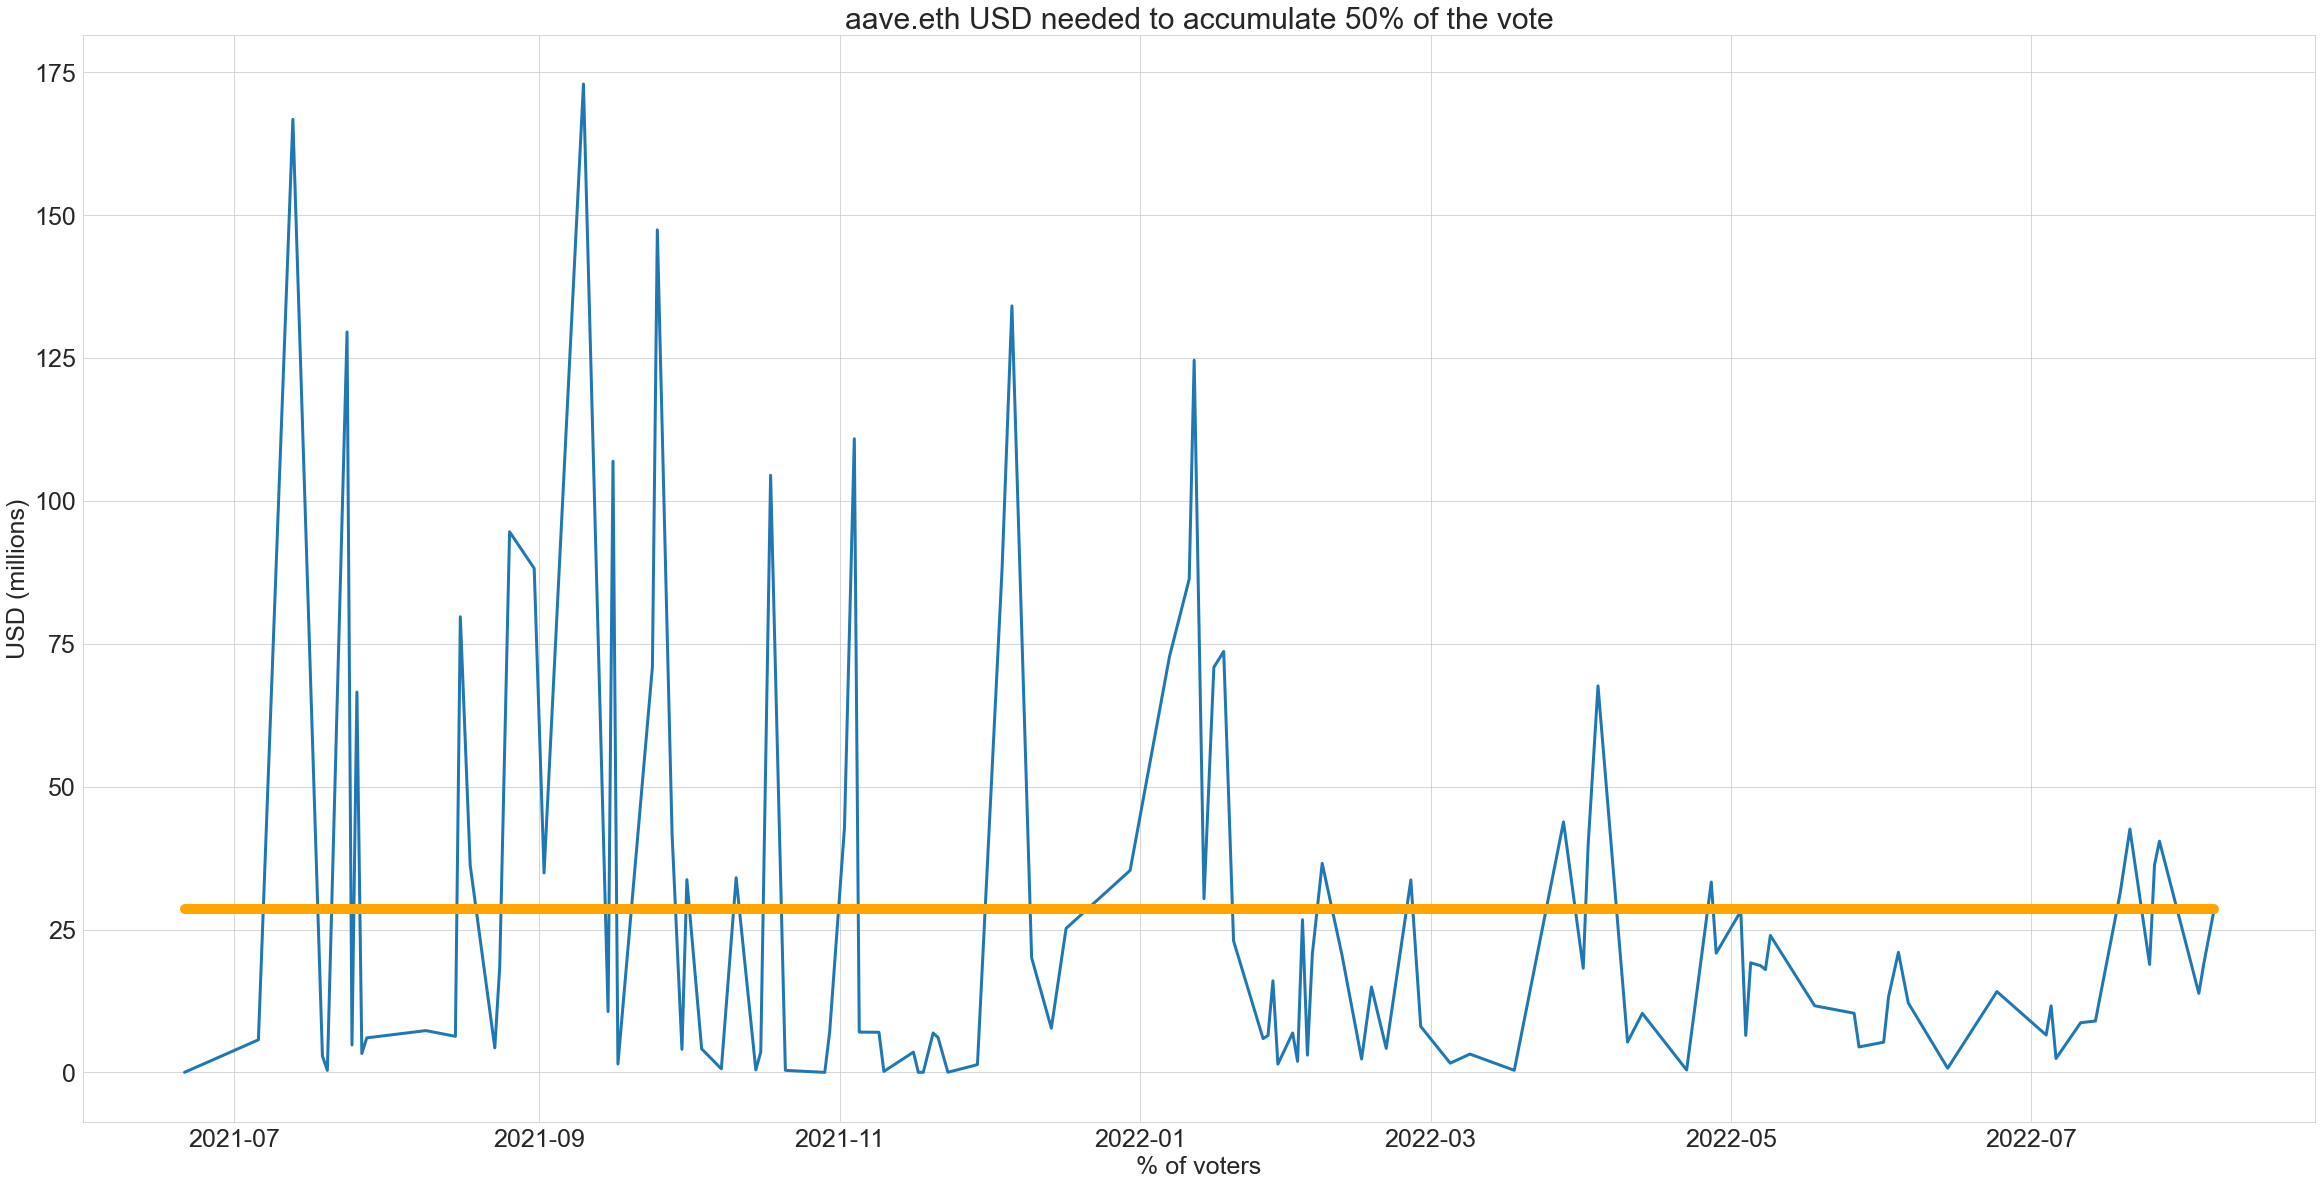

In [106]:

sns.set_style("whitegrid")
plt.rc("font", size=25)

plot_title = spacename + ' USD needed to accumulate 50% of the vote'
ax=sns.lineplot(data=proposal_prices, y="proposal_usd_value",x="proposal_date", linewidth = 3).set(title=plot_title,xlabel='% of voters',ylabel='USD (millions)',  )
chart = sns.lineplot(data=avg_price,x="proposal_date",y="avg_proposal_price",zorder=3,color = 'orange', linewidth = 10)

#chart.legend(bbox_to_anchor=(1, 1), ncol=1)
#g.set(xlim = (50000,250000))
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
chart.yaxis.set_major_formatter(ticks_y)
print(chart)

In [ ]:
plt.rc("figure", figsize=(40, 20))
sns.set_style("whitegrid")
plt.rc("font", size=25)
chart = sns.lineplot(data=proposal_prices,x="proposal_date",y="proposal_usd_value", color = 'orange')

In [ ]:
voters_df = db.query("select  proposals_title, count(distinct votes_voter) total_voters,  min(proposal_date) proposal_date from crunch_data group by 1 order by 1 asc").df()

chart = sns.barplot(data=voters_df,x="proposals_title",y="total_voters", color = 'orange')
#and save the chart file, too

print(chart)



In [ ]:
p50 = db.query("select min(percentage_voters_counted) "
               "from data_means  where cum_percentage_of_total_vp>=0.5 ").df()
p50display = round(100*(p50.iloc[0,0]),2)
print('On average, a proposal at ', spacename, 'takes ',p50display,'% of the voting population.')

print('A total of ',leader_count, 'wallets have driven the result of all proposals at',spacename,)
print('That\'s', ("{0:.2%}".format(elite)), 'of all DAO voters.')